In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import plotly.graph_objs as go
import plotly.express as px

In [ ]:
train_data = pd.read_csv('test-Minimum-Error-Rate-Classifier.txt', sep = ',', header = None)

In [ ]:
print(train_data, '\n\n')
print(train_data.shape)
train_data = np.array(train_data)

   0    1
0  1  1.0
1  1 -1.0
2  4  5.0
3 -2  2.5
4  0  2.0
5  2 -3.0 


(6, 2)


In [ ]:
print('\u03A9')
print('\u03BC')
print('\u03A3')
print('\u03C9')

Ω
μ
Σ
ω


In [ ]:
ω1 = 0.5
μ1 = np.array([0., 0.])
Σ1 = np.array([[0.25, 0.30],[0.30, 1.00]])

ω2 = 0.5
μ2 = np.array([2., 2.])
Σ2 = np.array([[0.50, 0.00], [0.00, 0.50]])

ω = [ω1, ω2]
μ = [μ1, μ2]
Σ = [Σ1, Σ2]

In [ ]:
# ω  μ  Σ
result = np.zeros((train_data.shape[0], len(ω)))
for i in range(len(ω)):
  for j in range(train_data.shape[0]):
    temp = np.dot( (train_data[j] - μ[i]).T, np.linalg.inv(Σ[i]))
    temp = np.dot(temp, (train_data[j]-μ[i])) * 0.5 * -1
    temp = np.exp(temp) 
    temp = temp / ( ( (2 * math.pi)**(train_data.shape[1]/2) ) * (np.linalg.det(Σ[i]) ** 0.5) ) 
    temp = temp * ω[i]
    result[j][i] = temp
  print('\n\n')
print(result)
print(result.shape)







[[2.60957317e-02 2.15392793e-02]
 [6.13712786e-04 7.22562324e-06]
 [2.44194018e-15 3.59742598e-07]
 [4.76386919e-13 1.39487343e-08]
 [8.74097521e-03 2.91502447e-03]
 [8.52320872e-15 2.21033492e-12]]
(6, 2)


In [ ]:
lst = []
symbol = []
for i in range(train_data.shape[0]):
  if result[i][0] > result[i][1]:
    lst.append([train_data[i][0],train_data[i][1], result[i][0], result[i][1], result[i][0] , 'Class 1', '#FF0000' ])
    symbol.append('cross')
  else:
    lst.append([train_data[i][0],train_data[i][1], result[i][0], result[i][1], result[i][1],'Class 2', '#FFFF00' ])
    symbol.append('circle')

df = pd.DataFrame(lst, columns = ['Feature 1', 'Feature 2', 'PDF Class 1', 'PDF Class 2', 'Assigned PDF', 'Classified Class', 'Color'])

In [ ]:
df

,Feature 1,Feature 2,PDF Class 1,PDF Class 2,Assigned PDF,Classified Class,Color
0,1.0,1.0,2.609573e-02,2.153928e-02,2.609573e-02,Class 1,#FF0000
1,1.0,-1.0,6.137128e-04,7.225623e-06,6.137128e-04,Class 1,#FF0000
2,4.0,5.0,2.441940e-15,3.597426e-07,3.597426e-07,Class 2,#FFFF00
3,-2.0,2.5,4.763869e-13,1.394873e-08,1.394873e-08,Class 2,#FFFF00
4,0.0,2.0,8.740975e-03,2.915024e-03,8.740975e-03,Class 1,#FF0000
5,2.0,-3.0,8.523209e-15,2.210335e-12,2.210335e-12,Class 2,#FFFF00


In [ ]:
X = np.linspace(-6, 6, 500)
Y = np.linspace(-6, 6, 500)
Z = np.zeros((500, 500))

for i in range(len(X)):
  for j in range(len(Y)):
    train = np.array([X[i],Y[j]]);
    res = []
    for k in range(len(ω)):
      temp = np.dot( (train - μ[k]).T, np.linalg.inv(Σ[k]))
      temp = np.dot(temp, (train-μ[k])) * 0.5 * -1
      temp = np.exp(temp) 
      temp = temp / ( ( (2 * math.pi)**(2/2) ) * (np.linalg.det(Σ[k]) ** 0.5) ) 
      temp = temp * 0.5
      res.append(temp)
    Z[i][j] = max(res[0], res[1])

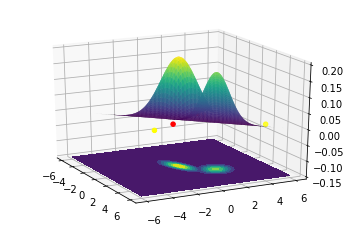

In [ ]:
from   matplotlib import cm
from   mpl_toolkits.mplot3d import Axes3D
from   scipy.stats import multivariate_normal

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

ax.scatter(xs = df[df['Classified Class']=='Class 1']['Feature 1'].to_list(), 
                  ys = df[df['Classified Class']=='Class 1']['Feature 2'].to_list(), zs = df[df['Classified Class']=='Class 1']['Assigned PDF'].to_list(), c='red')


ax.scatter(xs = df[df['Classified Class']=='Class 2']['Feature 1'].to_list(), 
                  ys = df[df['Classified Class']=='Class 2']['Feature 2'].to_list(), zs = df[df['Classified Class']=='Class 2']['Assigned PDF'].to_list(), c='yellow')

ax.set_zlim(-0.15,0.2)
ax.view_init(21, -27)
#ax.view_init(21, 27)

plt.show()

In [ ]:
for i in range(len(X)):
  for j in range(len(Y)):
    train = np.array([X[i],Y[j]]);
    res = []
    for k in range(len(ω)):
      temp = np.dot( (train - μ[k]).T, np.linalg.inv(Σ[k]))
      temp = np.dot(temp, (train-μ[k])) * 0.5 * -1
      temp = np.exp(temp) 
      temp = temp / ( ( (2 * math.pi)**(2/2) ) * (np.linalg.det(Σ[k]) ** 0.5) ) 
      temp = temp * 0.5
      res.append(temp)
    if abs((np.log10(res[0]) - np.log10(res[1])) - np.log10(0.5) + np.log10(0.5)) < 0.1:
      Z[i][j] = 0.15

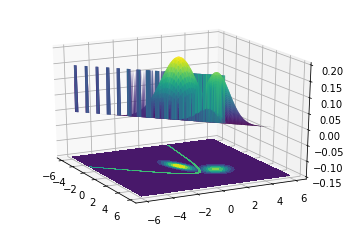

In [ ]:
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)


ax.set_zlim(-0.15,0.2)
ax.view_init(21, -27)
#ax.view_init(21, 27)

plt.show()